In [18]:
%pip install matplotlib numpy seaborn 
import os 
import sys
import re
from collections import defaultdict
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 353.4 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 38.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 20.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 32.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 26.1

Matplotlib is building the font cache; this may take a moment.


In [13]:
FP = "../src/"

# overriden int with built in exception 
def exc_int(s: str) -> int:
    try:
        return int(s)
    except ValueError:
        return 0

# {file_path: ([line ; mem usage])}
mem_record = defaultdict(list)

def process_mem_file(fp: str) -> None:
    mem_start = r"\s*(\d*)"
    with open(fp, "r") as f:
        for line_n, line in enumerate(f):
            mem_usage = re.search(mem_start, line)
            if exc_int(mem_usage.group(1)) > 0:
                mem_record[fp].append((line_n + 1, mem_usage.group(1), line))

for f in os.listdir(FP):
    if f.endswith(".mem"):
        process_mem_file(FP + f)

In [16]:
def find_max_mem_usage() -> None:
    max_mem = 0
    max_mem_fp = ""
    max_mem_line = 0
    for fp, mem_usage in mem_record.items():
        for line_n, mem, _ in mem_usage:
            if exc_int(mem) > max_mem:
                max_mem = exc_int(mem)
                max_mem_fp = fp
                max_mem_line = line_n
    print(f"Max memory usage: {bytes_to_gb(max_mem)} GB in {max_mem_fp} @ L{max_mem_line}")
    
def bytes_to_gb(b: int) -> float:
    return b / 1024 / 1024 / 1024
    
find_max_mem_usage()

Max memory usage: 8.03495767712593 GB in ../src/bvh.jl.178346.mem @ L66


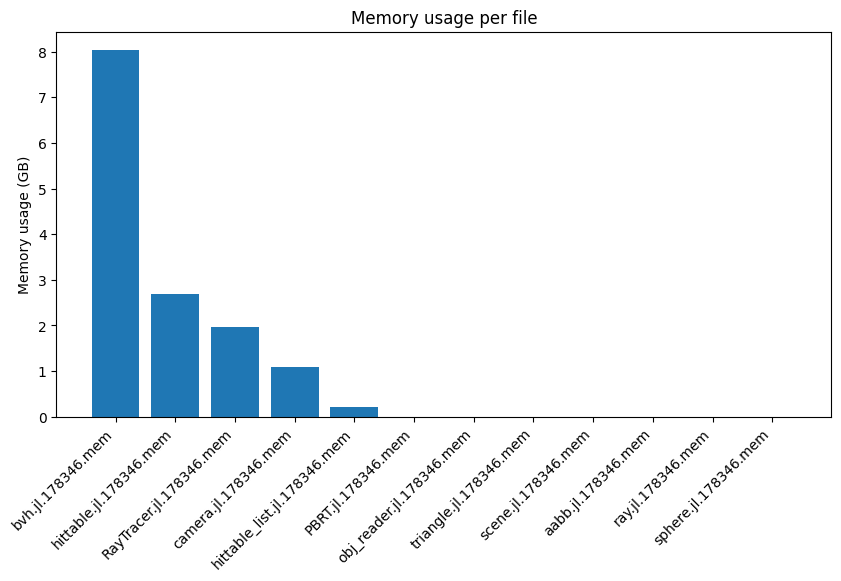

In [24]:
# aggregate total memory usage for each file 
mem_usage = {}
for fp, mem in mem_record.items():
    mem_usage[fp] = sum([exc_int(m) for _, m, _ in mem])
    
# sort by memory usage
mem_usage = dict(sorted(mem_usage.items(), key=lambda item: item[1], reverse=True))

# plot memory usage
plt.figure(figsize=(10, 5))
plt.bar(mem_usage.keys(), [bytes_to_gb(v) for v in mem_usage.values()])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Memory usage (GB)")
plt.title("Memory usage per file")
plt.show()